# Vizualizacija podatkov

Prostor za uvoz knjižnic :)

In [1]:
import pandas as pd
import random
from itertools import product
import matplotlib.pyplot as plt

Dani so naslednji meseci in kategorije izdelkov v spletni trgovini:

In [2]:
meseci = ["Januar", "Februar", "Marec", "April", "Maj", "Junij", "Julij"]
kategorije = ["Elektronika", "Oblačila", "Hrana", "Športna oprema"]
#

Za vajo sestavi podatkovno tabelo `trgovina`, ki ima stolpce:

* mesec
* kategorija
* prihodek - naključno (celo) število med 10000 in 25000, ki označuje prihodek v danem mesecu iz naslova dane kategorije
* kolicina_prodanih: število prodanih izdelkov v kategoriji - naključno (celo) število med 50 in 200
* zadovoljstvo_strank - naključno celo število med 1 in 5 (meji vključeni)

Posamezni pari `(mesec, kategorija)` naj se ne ponavljajo (namig: pomagaj si s funkcijo `product` iz paketa `itertools`).

Tabela naj ima 25 vrstic.

In [4]:
pari = list(product(meseci, kategorije))
izbrani_pari = random.sample(pari, 25)
prihodek = [random.randint(10000, 25000) for _ in range(25)]
kolicina_prodanih = [random.randint(50, 200) for _ in range(25)]
zadovoljstvo_strank = [random.randint(1, 5) for _ in range(25)]
trgovina = pd.DataFrame({
    'mesec': [par[0] for par in izbrani_pari],
    'kategorija': [par[1] for par in izbrani_pari],
    'prihodek': prihodek,
    'kolicina_prodanih': kolicina_prodanih,
    'zadovoljstvo_strank': zadovoljstvo_strank
    })
print(trgovina)

      mesec      kategorija  prihodek  kolicina_prodanih  zadovoljstvo_strank
0     Junij     Elektronika     20990                 63                    4
1    Januar           Hrana     19676                157                    2
2     Marec           Hrana     10513                107                    4
3       Maj           Hrana     10816                145                    1
4       Maj  Športna oprema     13261                137                    1
5       Maj     Elektronika     19424                137                    5
6   Februar        Oblačila     24422                 97                    5
7   Februar  Športna oprema     14087                115                    4
8       Maj        Oblačila     10714                122                    4
9    Januar        Oblačila     12261                 67                    3
10    Marec  Športna oprema     24991                186                    5
11    April  Športna oprema     11288                168        

Sestavi kodo, ki nariše sledeče diagrame. Grafom nastavi smiselne naslove ter imena in zaloge vrednosti osi. Po potrebi nastavi podatkovne tipe stolpcev.

Nariši razsevni diagram, ki prikazuje prihodek v odvisnosti od števila prodanih izdelkov.

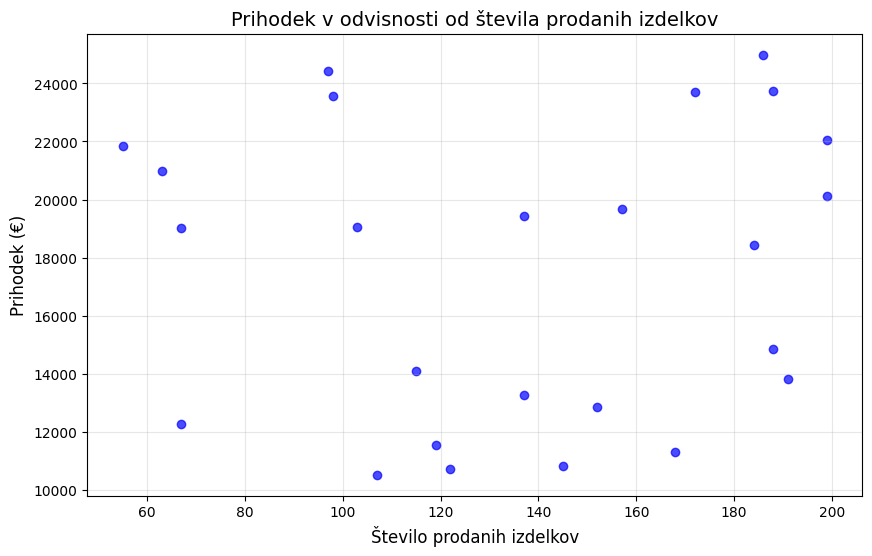

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(trgovina["kolicina_prodanih"], trgovina["prihodek"], color="blue", alpha=0.7)
plt.title("Prihodek v odvisnosti od števila prodanih izdelkov", fontsize=14)
plt.xlabel("Število prodanih izdelkov", fontsize=12)
plt.ylabel("Prihodek (€)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Kodo, ki je narisala zgornji graf dopolni, da bodo oblike odvisne od kategorije, barva pa od zadovoljstva strank.

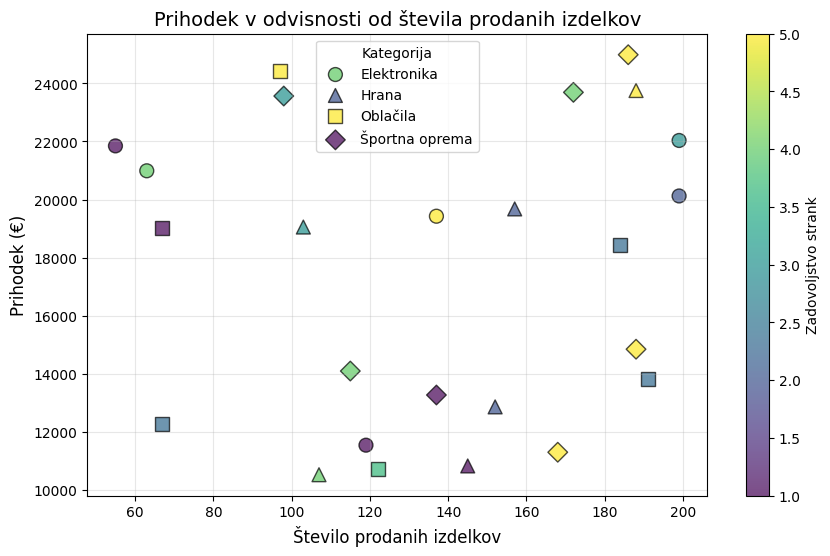

In [6]:
# Določitev barv in oblik
barve = trgovina["zadovoljstvo_strank"]  # Barve na podlagi zadovoljstva (1–5)
oblike = {
    "Elektronika": "o",  # Krog
    "Oblačila": "s",    # Kvadrat
    "Hrana": "^",      # Trikotnik
    "Športna oprema": "D"     # Diamant
}

# Risanje razsevnega diagrama
plt.figure(figsize=(10, 6))

for kategorija, skupina in trgovina.groupby("kategorija"):
    plt.scatter(
        skupina["kolicina_prodanih"],
        skupina["prihodek"],
        c=skupina["zadovoljstvo_strank"],
        cmap="viridis",
        label=kategorija,
        marker=oblike[kategorija],
        edgecolors="black",
        alpha=0.7,
        s=100
    )

# Prilagoditev grafa
plt.title("Prihodek v odvisnosti od števila prodanih izdelkov", fontsize=14)
plt.xlabel("Število prodanih izdelkov", fontsize=12)
plt.ylabel("Prihodek (€)", fontsize=12)
plt.colorbar(label="Zadovoljstvo strank")
plt.grid(alpha=0.3)
plt.legend(title="Kategorija", fontsize=10)
plt.show()

Nariši diagram prihodkov po mesecih (angl. line plot). Točke za posamezne kategorije naj bodo med seboj povezane s črto. Vsaka kategorija naj bo pobarvana s svojo barvo.

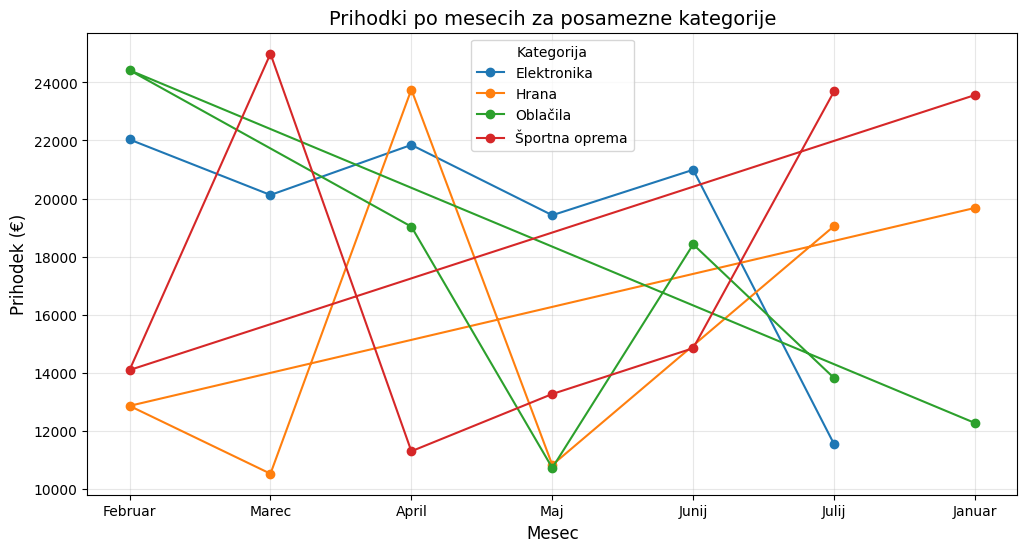

In [7]:

# Poskrbimo, da so meseci urejeni kronološko (nebi bilo potrebno)
trgovina["mesec"] = pd.Categorical(trgovina["mesec"], categories=meseci, ordered=True)

# Ustvari linijski diagram
plt.figure(figsize=(12, 6))

for kategorija, skupina in trgovina.groupby("kategorija"):
    skupina = skupina.sort_values("mesec")  # Urejanje po mesecih
    plt.plot(
        skupina["mesec"],
        skupina["prihodek"],
        marker="o",
        label=kategorija
    )

# Prilagoditve grafa
plt.title("Prihodki po mesecih za posamezne kategorije", fontsize=14)
plt.xlabel("Mesec", fontsize=12)
plt.ylabel("Prihodek (€)", fontsize=12)
plt.legend(title="Kategorija", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Nariši stolpčni diagram skupnih prihodkov po mesecih. Vsak mesec naj bo pobarvan s svojo barvo.

C:\Users\Aneja\AppData\Local\Temp\ipykernel_6432\961425851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skupni_prihodki = trgovina.groupby("mesec")["prihodek"].sum()


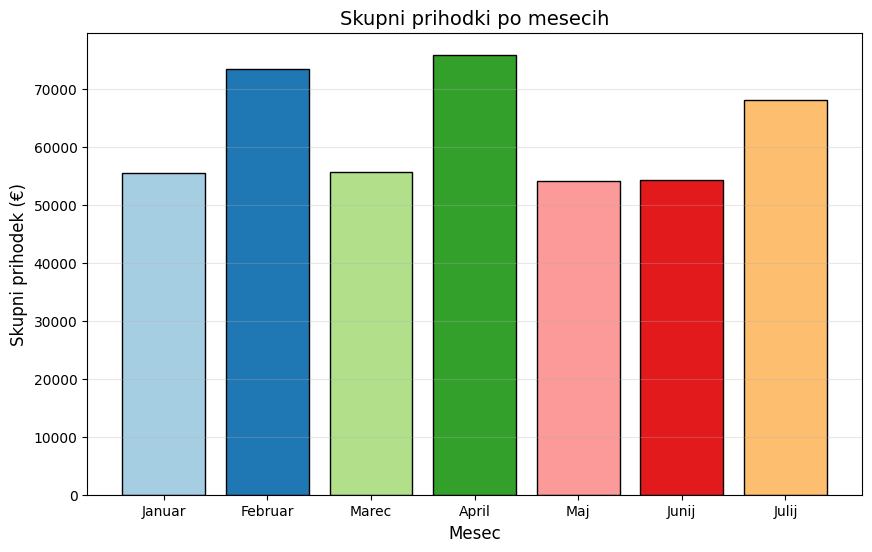

In [8]:
# Izračun skupnih prihodkov po mesecih
skupni_prihodki = trgovina.groupby("mesec")["prihodek"].sum()

# Risanje stolpčnega diagrama
plt.figure(figsize=(10, 6))
barve = plt.cm.Paired(range(len(skupni_prihodki)))  # Barvna paleta

plt.bar(
    skupni_prihodki.index,
    skupni_prihodki.values,
    color=barve,
    edgecolor="black"
)

# Prilagoditve grafa
plt.title("Skupni prihodki po mesecih", fontsize=14)
plt.xlabel("Mesec", fontsize=12)
plt.ylabel("Skupni prihodek (€)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

Nariši zloženi stolpčni diagram prihodkov po mesecih glede na kategorijo.

C:\Users\Aneja\AppData\Local\Temp\ipykernel_6432\207113283.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tabela = trgovina.pivot_table(


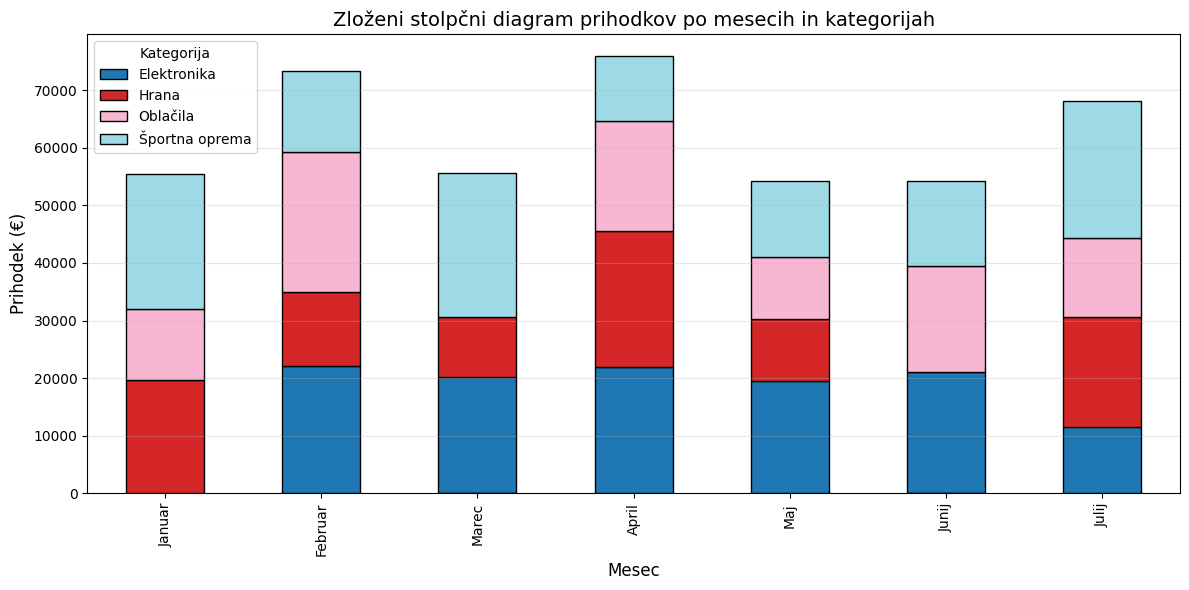

In [9]:
# Pivot tabela: prihodki po mesecih in kategorijah
pivot_tabela = trgovina.pivot_table(
    index="mesec", 
    columns="kategorija", 
    values="prihodek", 
    aggfunc="sum",
    fill_value=0
)

# Risanje zloženega stolpčnega diagrama
pivot_tabela.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20",
    edgecolor="black"
)

# Prilagoditve grafa
plt.title("Zloženi stolpčni diagram prihodkov po mesecih in kategorijah", fontsize=14)
plt.xlabel("Mesec", fontsize=12)
plt.ylabel("Prihodek (€)", fontsize=12)
plt.legend(title="Kategorija", fontsize=10)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

Nariši še stolpčni diagram, podoben zgornjemo, le da so sedaj stolpci eden poleg drugega:

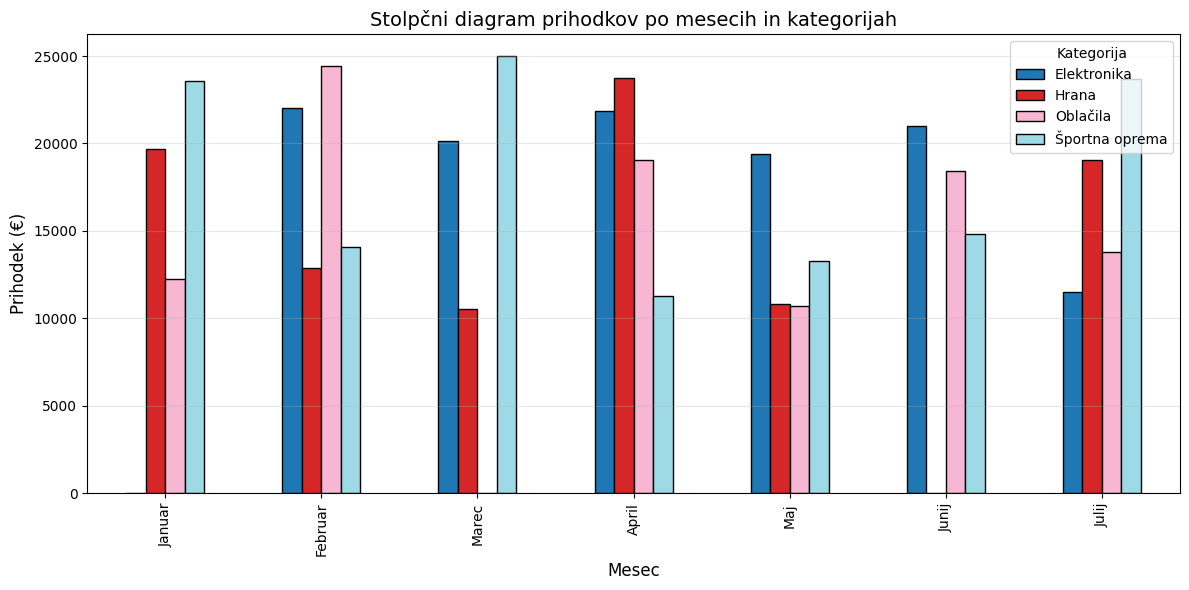

In [10]:
# Risanje stolpčnega diagrama (eden poleg drugega)
pivot_tabela.plot(
    kind="bar",
    figsize=(12, 6),
    colormap="tab20",
    edgecolor="black"
)

# Prilagoditve grafa
plt.title("Stolpčni diagram prihodkov po mesecih in kategorijah", fontsize=14)
plt.xlabel("Mesec", fontsize=12)
plt.ylabel("Prihodek (€)", fontsize=12)
plt.legend(title="Kategorija", fontsize=10)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

Nariši še diagram škatel, ki prikazuje porazdelitev zadovoljstva strank po mesecih. 

<Figure size 1000x600 with 0 Axes>

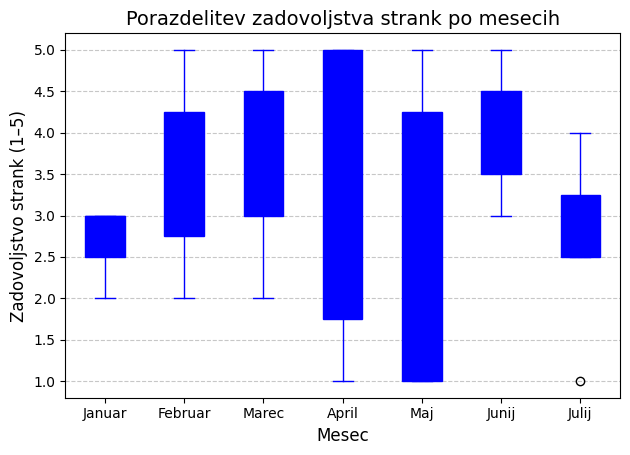

In [11]:
# Poskrbimo, da so meseci urejeni kronološko
trgovina["mesec"] = pd.Categorical(trgovina["mesec"], categories=meseci, ordered=True)

# Risanje diagrama škatel
plt.figure(figsize=(10, 6))
trgovina.boxplot(column="zadovoljstvo_strank", by="mesec", grid=False, color="blue", patch_artist=True)

# Prilagoditve grafa
plt.title("Porazdelitev zadovoljstva strank po mesecih", fontsize=14)
plt.suptitle("")  # Odstrani privzeti naslov "Boxplot grouped by ..."
plt.xlabel("Mesec", fontsize=12)
plt.ylabel("Zadovoljstvo strank (1–5)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Prikaži različna razmerja listov za podatke iz zbirke iris.

In [13]:
# Naložimo podatke Iris
iris_data = load_iris()
iris = pd.DataFrame(
    data=iris_data.data, 
    columns=iris_data.feature_names
)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Preimenujemo stolpce za boljšo berljivost
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Nastavimo velikost grafa
plt.figure(figsize=(12, 6))

# Risanje razsevnega diagrama za sepal (čašni listi)
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=iris, 
    x="sepal_length", 
    y="sepal_width", 
    hue="species", 
    style="species", 
    palette="tab10"
)
plt.title("Razmerje med dolžino in širino čašnega lista", fontsize=12)
plt.xlabel("Dolžina čašnega lista (cm)")
plt.ylabel("Širina čašnega lista (cm)")
plt.grid(alpha=0.3)

# Risanje razsevnega diagrama za petal (venčni listi)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=iris, 
    x="petal_length", 
    y="petal_width", 
    hue="species", 
    style="species", 
    palette="tab10"
)
plt.title("Razmerje med dolžino in širino venčnega lista", fontsize=12)
plt.xlabel("Dolžina venčnega lista (cm)")
plt.ylabel("Širina venčnega lista (cm)")
plt.grid(alpha=0.3)

# Prilagoditev postavitve in prikaz
plt.tight_layout()
plt.show()

NameError: name 'load_iris' is not defined